### K-means? 

* 군집화 알고리즘 중 대표적인 분리형 군집화 방법. 각각의 군집은 중심(Centroid)를 가진다. 각각의 군집은 교집합이 없다. 

* A를 최적화하여 고정하고, B를 최적화한다. 최적화된 B를 고정시키고 A를 최적화한다. 이 방법을 반복하다보면 A와 B가 최적값에 수렴하게되는 알고리즘.  
  Centroid 와 Membership 을 최적화하는 것이 K-means 클러스터링의 궁극적 목적이다. 하지만 이 둘을 동시에 최적화하는 것이 어렵다. 하지만 한 가지를 먼저 최적화하고, 고정된 상태에서 나머지 하나를 최적화하는 것은 쉽다.

### 원리

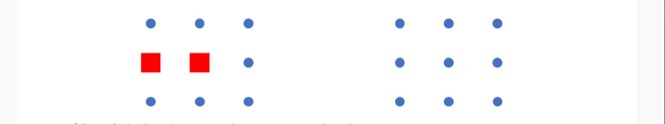

In [5]:
from IPython.display import Image
Image("p1.jpg")


* 초기 centroid를 선정한다.

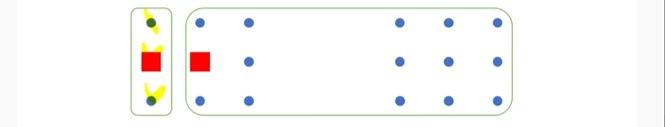

In [6]:
from IPython.display import Image
Image("p2.jpg")


* 초기 Centroid 기준 군집화를 진행하면 멤버쉽이 형성된다.

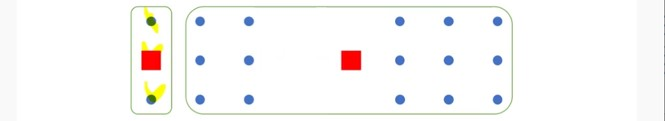

In [7]:
from IPython.display import Image
Image("p3.jpg")


* 형성된 멤버쉽 기준으로 Centroid를 다시 구한다.

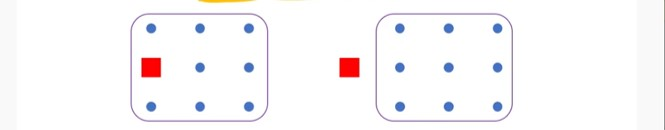

In [8]:
from IPython.display import Image
Image("p4.jpg")


* 새로운 Centroid를 기준으로 맴버쉽을 짠다.

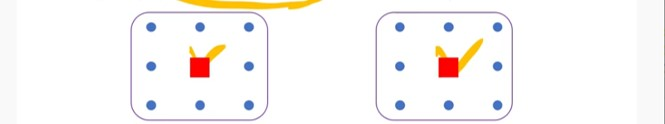

In [9]:
from IPython.display import Image
Image("p5.jpg")


* 각 멤버쉽의 Centroid를 다시 구하면 위 그림과 같이 된다. 더 이상 위의 과정을 반복하더라도 Centroid는 변경되지 않는다. 

### 단점?

* 초기 Centorid는 임의로 선정된다. 임의로 선정되기 때문에 이에따라서 결과가 달라지기도한다. 아래 그림과 같이 왼쪽 그림은 올바르게 초기값이 선정돼서 군집화가 이루어졌다. 하지만 오른쪽 그림은 세로로 길게 군집화가 시작돼서 올바르게 군집화가 되지 않았다.

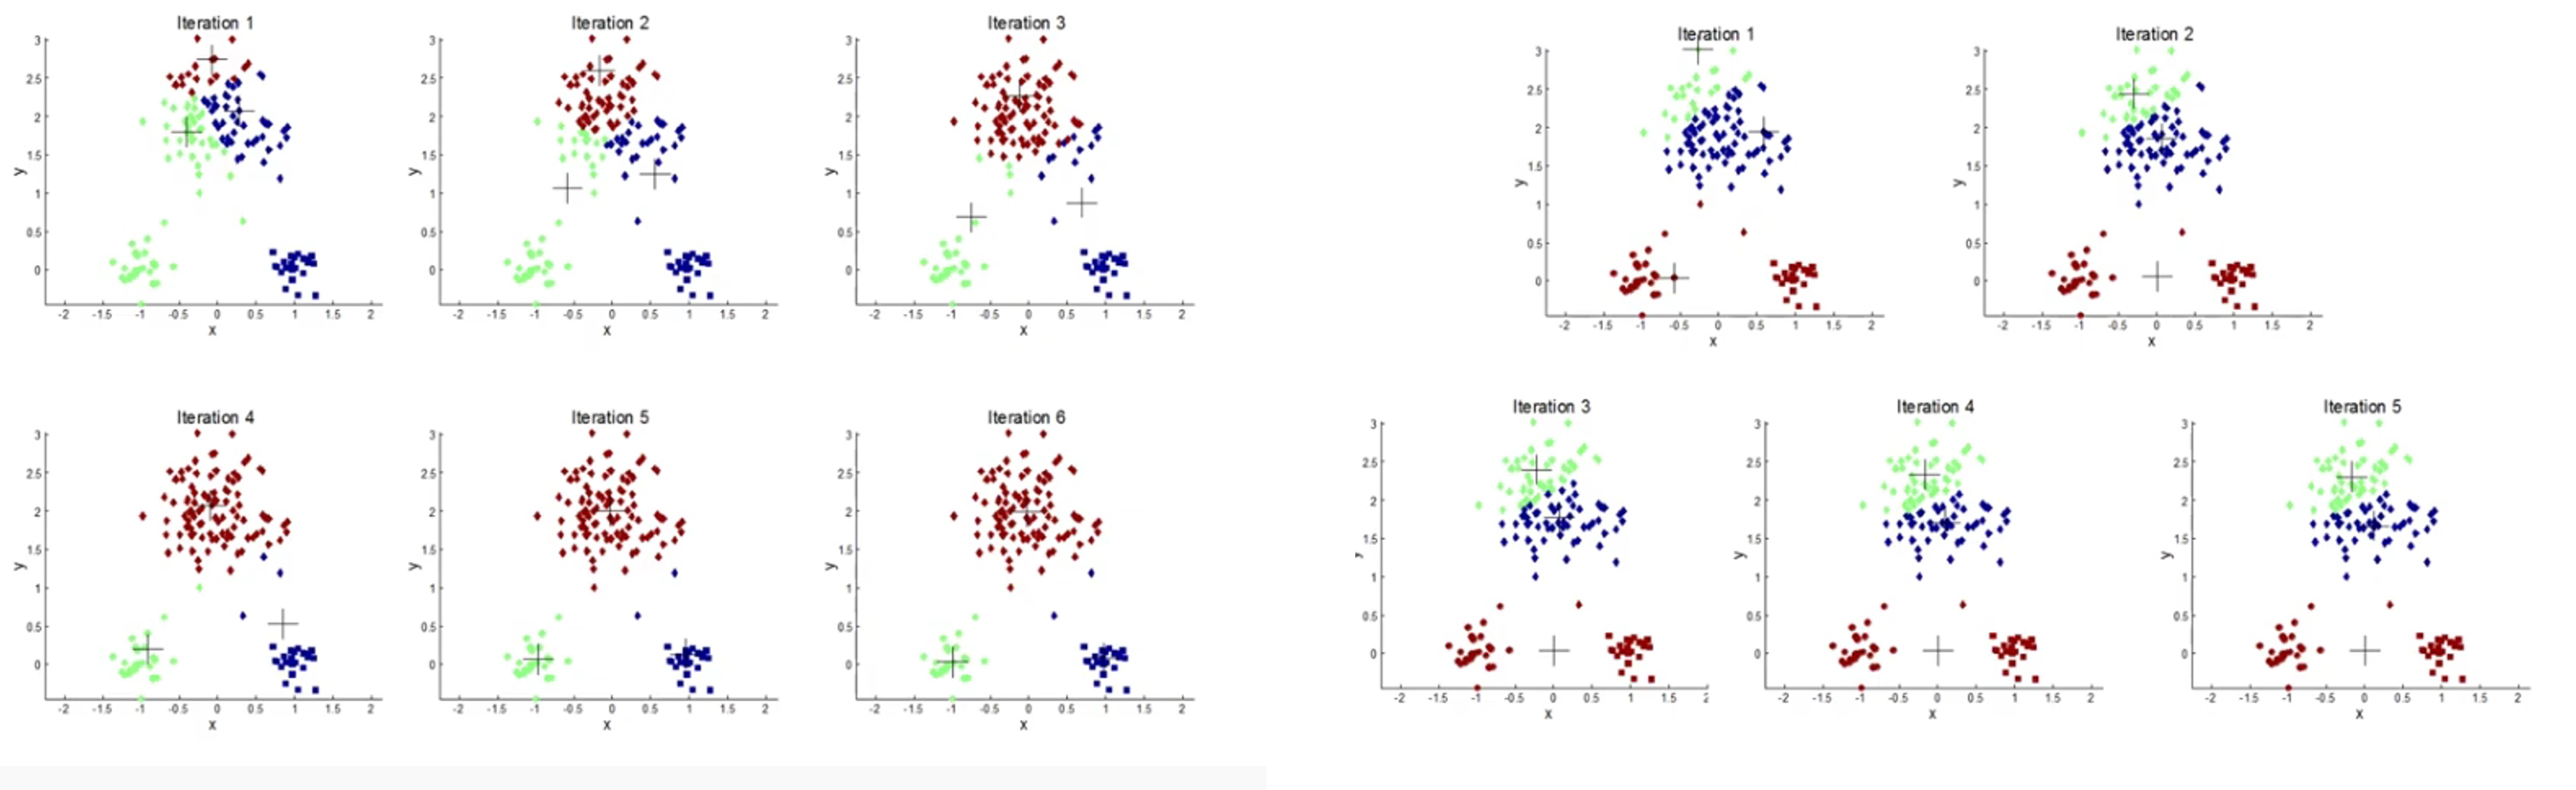

In [10]:
from IPython.display import Image
Image("pic4.jpg")

* 보통 왼쪽그림과 같이될 확률이 80%정도 된다. 따라서 여러번은 K-means를 시행하여 그 중 지배적인 결과값이 제대로된 군집화일 확률이 높다.

### Hyperparameter 튜닝

In [11]:
from sklearn.cluster import KMeans

In [12]:
KMeans()

KMeans()

* 클러스터 갯수를 직접 정해줘야하는게 한계점이다.  
  클러스터가 4개인데 3개로 지정해주면 아래 그림과 같은 결과를 얻는다.

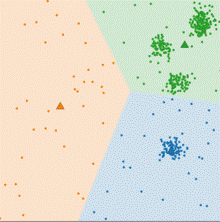

In [14]:
from IPython.display import Image
Image("k1.gif")


* 원래 클러스터가 5개인데 8개로 더 많이 지정해주면 아래 그림과 같이 과다한 클러스터 생성이된다

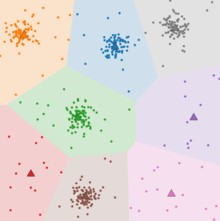

In [17]:
from IPython.display import Image
Image("k2.jpg")

* K-Means에서 튜닝이 필요한 변수는 클러스터의 갯수이다. 육안으로 군집 정도를 확인하고 분석할 수 있으면 가장 좋지만 사람이 판단하기 어렵거나 데이터가 복잡할 때는 여러 군집 갯수를 반복적으로 분석하여 좋은 결과를 만들어낼 수 있다.

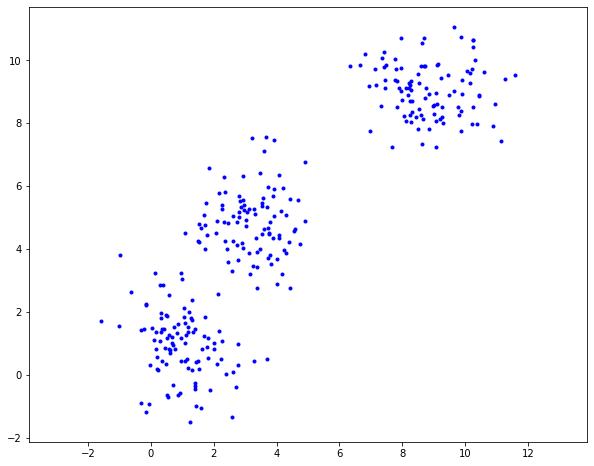

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
G0=np.random.multivariate_normal([1,1],np.eye(2),100)
G1=np.random.multivariate_normal([3,5],np.eye(2),100)
G2=np.random.multivariate_normal([9,9],np.eye(2),100)

X=np.vstack([G0,G1,G2])
X=np.asmatrix(X)
plt.figure(figsize=(10,8))
plt.plot(X[:,0],X[:,1],'b.')
plt.axis('equal')
plt.show()

In [33]:
cost=[]

for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    cost.append(abs(kmeans.score(X)))

C:\Users\HJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


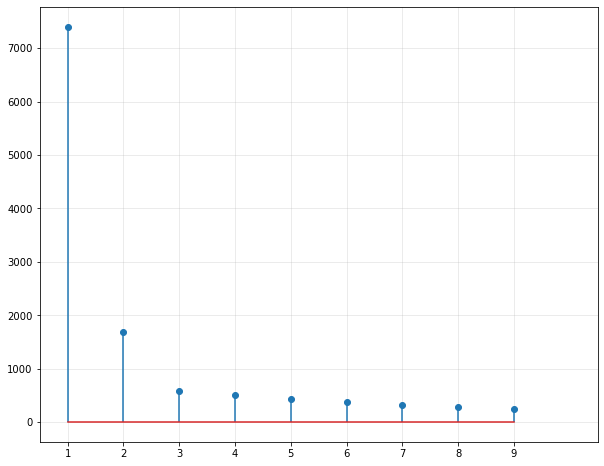

In [35]:
plt.figure(figsize=(10,8))
plt.stem(range(1,10),cost)
plt.xticks(np.arange(10))
plt.xlim([0.5,10.5])
plt.grid(alpha=0.3)
plt.show()